## Importing Required Libraries

In [26]:
import pandas as pd
import numpy as np
from scipy import linalg, optimize
import re
import random
import math
import string
from nltk.corpus import wordnet as wn
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from nltk import word_tokenize
from scipy import optimize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from scipy.sparse import coo_matrix, hstack, vstack
import seaborn as sns
from textblob import TextBlob
# Graphing: 
%matplotlib inline


## Reading in Data Files

> * Training Set
> * Training Labels 
> * Testing Set
> * Testing Labels

> * Floor Pickle File for Mapping
> * Property Pickle File for Mapping
> * Street Pickle File for Mapping

In [14]:
# train_set = 'https://raw.githubusercontent.com/nicolepng/BT4222/master/Data/training_set.csv'
# train_labels = 'https://raw.githubusercontent.com/nicolepng/BT4222/master/Data/training_labels.csv'
# test_set = 'https://raw.githubusercontent.com/nicolepng/BT4222/master/Data/testing_set.csv'
# test_labels = 'https://raw.githubusercontent.com/nicolepng/BT4222/master/Data/testing_labels.csv'


In [33]:
# train_set = '/content/training_set.csv'
# train_labels = '/content/training_labels.csv'
# test_set = '/content/testing_set.csv'
# test_labels = '/content/testing_labels.csv'
combined = '/content/combined.csv'

In [34]:
# training_set = pd.read_csv(train_set)
# testing_set = pd.read_csv(test_set)
# training_labels= pd.read_csv(train_labels)
# testing_labels = pd.read_csv(test_labels)
df = pd.read_csv(combined)

In [35]:
df.drop(df.columns[0], axis = 1, inplace=True)
df.head()

,district,street,propertyType,remaining_lease,price,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,floor_range,sentiment
0,5,ZEHNDER ROAD,Semi-detached,999.00,5500000.0,27.0,6.0,8.0,0.0,-1.0,1.282130,103.786879,524.3,~-,0.380502
1,5,ZEHNDER ROAD,Semi-detached,999.00,5000000.0,27.0,6.0,8.0,0.0,-1.0,1.282130,103.786879,308.0,~-,0.123495
2,5,ZEHNDER ROAD,Semi-detached,999.00,4750000.0,27.0,6.0,8.0,0.0,-1.0,1.282130,103.786879,314.0,~-,0.123495
3,5,NEO PEE TECK LANE,Terrace,999.00,2630000.0,27.0,6.0,8.0,2.0,-1.0,1.292047,103.768591,159.3,~-,0.380502
4,4,COVE DRIVE,Condominium,85.25,3180000.0,11.0,3.0,2.0,0.0,-1.0,1.244208,103.827487,194.0,~01-05,0.173732


In [36]:
df['street'] = df['street'].astype('category')
street_dict = dict(zip(df['street'].cat.codes, df['street']))
df['street'] = df['street'].cat.codes

df['propertyType'] = df['propertyType'].astype('category')
property_dict = dict(zip(df['propertyType'].cat.codes, df['propertyType']))
df['propertyType'] = df['propertyType'].cat.codes

df['floor_range'] = df['floor_range'].astype('category')
floor_dict = dict(zip(df['floor_range'].cat.codes, df['floor_range']))
df['floor_range'] = df['floor_range'].cat.codes

In [37]:
training_set, testing_set, training_labels, testing_labels = train_test_split(df.drop('price', axis=1),
                                                    df['price'], 
                                                    test_size=0.2,
                                                    random_state=1)

## No normalise

## LightGBM

> With GridSearch

** checked: jx adjusted r2 fn returns the same results. tested in another notebook.

* Training Errors
> * Mean Squared Error:  154748781024.69647
> * RMSE:  393381.21590220404
> * Mean Absolute Error:  97869.27002052014
> * R-squared:  0.9447100131476823
> * Adjusted R2:  0.9447027746818947
> * Training sMAPE: 8.692195215735234
> * Training MAPE: 8.755165504591561

* Test Errors
> * Mean Squared Error:  109857614878.14053
> * RMSE:  331447.75588038086
> * Mean Absolute Error:  103059.25251342994
> * R-squared:  0.9478079138687274
> * Adjusted R2:  0.9477805707857713
> * Testing sMAPE: 8.932541697320472
> * Testing MAPE: 9.001885667238648




In [ ]:
train_adj_r_squared = 1 - (1-optimized_rf.score(training_set, training_labels))*(len(training_labels)-1)/(len(training_labels)-training_set.shape[1]-1)
print(train_adj_r_squared)

test_adj_r_squared = 1 - (1-optimized_rf.score(testing_set, testing_labels))*(len(testing_labels)-1)/(len(testing_labels)-testing_set.shape[1]-1)
print(test_adj_r_squared)

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_log_error

# Initialise LGBMRegressor
rf = LGBMRegressor(n_estimators=300, subsample=0.9, colsample_bytree=0.2, eval_metric = 'rmse')
optimized_rf = LGBMRegressor(boosting_type='gbdt', class_weight=None,
                               colsample_bytree=0.3, eval_metric='rmse',
                               importance_type='split', learning_rate=0.1,
                               max_depth=9, min_child_samples=20,
                               min_child_weight=0.001, min_samples_leaf=2,
                               min_split_gain=0.0, n_estimators=300, n_jobs=-1,
                               num_leaves=31, objective=None, random_state=None,
                               reg_alpha=0.0, reg_lambda=0.0, silent=True,
                               subsample=0.7, subsample_for_bin=200000,
                               subsample_freq=0)


# # Set up 5-fold cross-validation
from sklearn import model_selection
cv = model_selection.KFold(5)


# Pipeline Standardization and Model
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler())
                           , ('model', rf) ])
# Tuning the model
my_min_samples_leaf = [2, 10, 25, 50, 100]
my_max_depth = [7, 8, 9, 10, 11, 12]
my_subsample = [0.7, 0.8, 0.9]
my_colsample_bytree = [0.1, 0.2, 0.3]

# Run the model using GridSearch, select the model with best search
from sklearn.model_selection import GridSearchCV
optimized_rf = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid =dict(model__min_samples_leaf = my_min_samples_leaf, 
                                               model__max_depth = my_max_depth,
                                               model__subsample = my_subsample,
                                               model__colsample_bytree = my_colsample_bytree)
                            , scoring = 'neg_mean_squared_error'
                            , verbose = 1
                            , n_jobs = -1
                           )

# Fitting on Training Data
optimized_rf.fit(training_set, training_labels)


# Best model estimators
print(optimized_rf.best_estimator_)

def adjusted_r2(r2, n, p):
  result = 1-((1-r2)*((n-1)/(n-p-1)))
  return result


# Evaluate metrics on holdout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_train_pred = optimized_rf.predict(training_set)
y_pred = optimized_rf.predict(testing_set)
n1 = len(y_train_pred)
p1 = training_set.shape[1]
n2 = len(y_pred)
p2 = testing_set.shape[1]
print('Training Errors')
print("Mean Squared Error: ", mean_squared_error(training_labels, y_train_pred))
print("RMSE: ", mean_squared_error(training_labels, y_train_pred, squared = False))
print("Mean Absolute Error: ", mean_absolute_error(training_labels, y_train_pred))
print("R-squared: ", r2_score(training_labels, y_train_pred))
print("Adjusted R2: ", adjusted_r2(r2_score(training_labels, y_train_pred), n1, p1))

print('Test Errors')
print("Mean Squared Error: ", mean_squared_error(testing_labels, y_pred))
print("RMSE: ", mean_squared_error(testing_labels, y_pred, squared = False))
print("Mean Absolute Error: ", mean_absolute_error(testing_labels, y_pred))
print("R-squared: ", r2_score(testing_labels, y_pred))
print("Adjusted R2: ", adjusted_r2(r2_score(testing_labels, y_pred), n2, p2))



Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 23.5min finished


Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LGBMRegressor(boosting_type='gbdt', class_weight=None,
                               colsample_bytree=0.3, eval_metric='rmse',
                               importance_type='split', learning_rate=0.1,
                               max_depth=8, min_child_samples=20,
                               min_child_weight=0.001, min_samples_leaf=2,
                               min_split_gain=0.0, n_estimators=300, n_jobs=-1,
                               num_leaves=31, objective=None, random_state=None,
                               reg_alpha=0.0, reg_lambda=0.0, silent=True,
                               subsample=0.7, subsample_for_bin=200000,
                               subsample_freq=0))],
         verbose=False)
Training Errors
Mean Squared Error:  154748781024.69647
RMSE:  393381.21590220404
Mean Absolute Err

## Residual Plot (for LightGBM Model)

> Training Residual Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


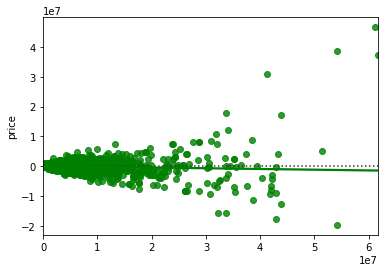

In [49]:
sns.residplot(y_train_pred.reshape(-1), training_labels, lowess= True, color="g")


> Testing Residual Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


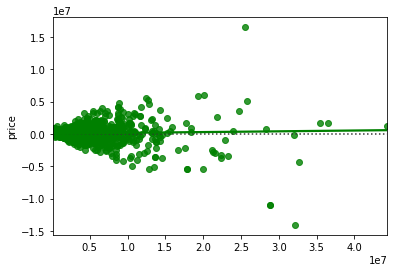

In [50]:
sns.residplot(y_pred.reshape(-1), testing_labels, lowess= True, color="g")

## sMAPE (for LightGBM Model)

In [51]:
def smape(y_true, y_pred):
    return 1/len(y_true) * np.sum(2 * np.abs(y_pred.squeeze()-y_true.squeeze()) / (np.abs(y_true.squeeze()) + np.abs(y_pred.squeeze()))*100)

In [52]:
print('Training sMAPE')
print(smape(y_train_pred, training_labels))
print('Testing sMAPE')
print(smape(y_pred, testing_labels))

Training sMAPE
8.692195215735234
Testing sMAPE
8.932541697320472


## MAPE (for LightGBM Model)

In [53]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mape(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100



In [54]:
print('Training MAPE')
print(mape(y_train_pred, training_labels))
print('Testing MAPE')
print(mape(y_pred, testing_labels))

Training MAPE
8.755165504591561
Testing MAPE
9.001885667238648


## XGBoost

> With Grid Search

* Training Errors
> * Mean Squared Error:  12132880148.301222
> * RMSE:  110149.35382607208
> * Mean Absolute Error:  49759.837263115034
> * R-squared:  0.9956650593339843
> * Adjusted R2:  0.9956644918113371
> * sMAPE: 5.221816592924819
> * MAPE: 5.215358761311443


* Test Errors
> * Mean Squared Error:  64160185612.8874
> * RMSE:  253298.60957551148
> * Mean Absolute Error:  72200.72230554672
> * R-squared:  0.9695182356050535
> * Adjusted R2:  0.9695022664136629
> * sMAPE: 5.968598907734008
> * MAPE: 5.9980976343903105

In [55]:
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn import preprocessing
from xgboost import XGBRFRegressor

# Initialise XGBRegressor
rf = xgboost.XGBRegressor(n_estimators=300, subsample=0.9, colsample_bynode=0.2, n_fold = 5, eval_metric = 'rmse')

# Set up 5-fold cross-validation
from sklearn import model_selection
cv = model_selection.KFold(5)

# Pipeline standardization and Model
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler())
                           , ('model', rf) ])
# Tuning the model
my_min_samples_leaf = [2, 10, 25, 50, 100]
my_max_depth = [7, 8, 9, 10, 11, 12]


# Run the model using GridSearch, select the model with best search
from sklearn.model_selection import GridSearchCV
optimized_rf = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid =dict(model__min_samples_leaf = my_min_samples_leaf, model__max_depth = my_max_depth)
                            , scoring = 'neg_mean_squared_error'
                            , verbose = 1
                            , n_jobs = -1
                           )

# Fitting on Training Data
optimized_rf.fit(training_set, training_labels)


# Best model estimators
print(optimized_rf.best_estimator_)

def adjusted_r2(r2, n, p):
  result = 1-((1-r2)*((n-1)/(n-p-1)))
  return result


# Evaluate metrics on holdout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_train_pred = optimized_rf.predict(training_set)
y_pred = optimized_rf.predict(testing_set)
n1 = len(y_train_pred)
p1 = training_set.shape[1]
n2 = len(y_pred)
p2 = testing_set.shape[1]
print('Training Errors')
print("Mean Squared Error: ", mean_squared_error(training_labels, y_train_pred))
print("RMSE: ", mean_squared_error(training_labels, y_train_pred, squared = False))
print("Mean Absolute Error: ", mean_absolute_error(training_labels, y_train_pred))
print("R-squared: ", r2_score(training_labels, y_train_pred))
print("Adjusted R2: ", adjusted_r2(r2_score(training_labels, y_train_pred), n1, p1))

print('Test Errors')
print("Mean Squared Error: ", mean_squared_error(testing_labels, y_pred))
print("RMSE: ", mean_squared_error(testing_labels, y_pred, squared = False))
print("Mean Absolute Error: ", mean_absolute_error(testing_labels, y_pred))
print("R-squared: ", r2_score(testing_labels, y_pred))
print("Adjusted R2: ", adjusted_r2(r2_score(testing_labels, y_pred), n2, p2))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 29.5min finished


[08:17:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=0.2,
                              colsample_bytree=1, eval_metric='rmse', gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=10,
                              min_child_weight=1, min_samples_leaf=2,
                              missing=None, n_estimators=300, n_fold=5,
                              n_jobs=1, nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,

## Residual Plot (for XGBoost Model)

> Training 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


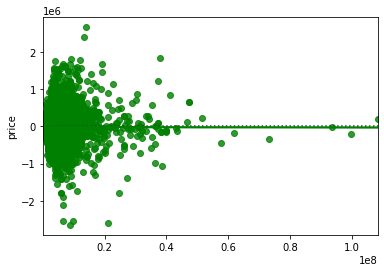

In [56]:
sns.residplot(y_train_pred.reshape(-1), training_labels, lowess= True, color="g")

> Testing 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


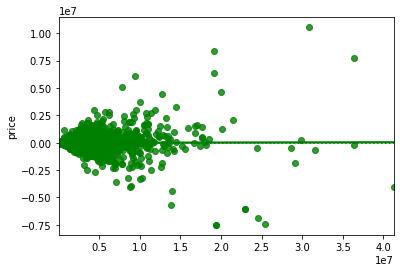

In [57]:
sns.residplot(y_pred.reshape(-1), testing_labels, lowess= True, color="g")

## sMAPE (for XGBoost Model)

In [58]:
print(smape(y_train_pred, training_labels))
print(smape(y_pred, testing_labels))

5.221816592924819
5.968598907734008


## MAPE (for XGBoost Model)

In [59]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mape(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

print(mape(y_train_pred, training_labels))
print(mape(y_pred, testing_labels))

5.215358761311443
5.9980976343903105


## Normalise price, remaining_lease, floor_area_sqm

In [60]:
training_set.columns

Index(['district', 'street', 'propertyType', 'remaining_lease', 'school',
       'hawkercentre', 'supermarkets', 'Bus Stops Nearby', 'crime_number',
       'latitude', 'longitude', 'floor_area_sqm', 'floor_range', 'sentiment'],
      dtype='object')

In [62]:
training_set['remaining_lease'] = (training_set['remaining_lease'] - training_set['remaining_lease'].mean()) / training_set['remaining_lease'].std()    
training_set['floor_area_sqm'] = (training_set['floor_area_sqm'] - training_set['floor_area_sqm'].mean()) / training_set['floor_area_sqm'].std()   

testing_set['remaining_lease'] = (testing_set['remaining_lease'] - training_set['remaining_lease'].mean()) / training_set['remaining_lease'].std()    
testing_set['floor_area_sqm'] = (testing_set['floor_area_sqm'] - training_set['floor_area_sqm'].mean()) / training_set['floor_area_sqm'].std()   

  

In [64]:
training_labels = (training_labels - training_labels.mean()) / training_labels.std()    
testing_labels = (testing_labels - training_labels.mean()) / training_labels.std() 

## LightGBM

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_log_error

# Initialise LGBMRegressor
rf = LGBMRegressor(n_estimators=300, subsample=0.9, colsample_bytree=0.2, eval_metric = 'rmse')
optimized_rf = LGBMRegressor(boosting_type='gbdt', class_weight=None,
                               colsample_bytree=0.3, eval_metric='rmse',
                               importance_type='split', learning_rate=0.1,
                               max_depth=9, min_child_samples=20,
                               min_child_weight=0.001, min_samples_leaf=2,
                               min_split_gain=0.0, n_estimators=300, n_jobs=-1,
                               num_leaves=31, objective=None, random_state=None,
                               reg_alpha=0.0, reg_lambda=0.0, silent=True,
                               subsample=0.7, subsample_for_bin=200000,
                               subsample_freq=0)


# # Set up 5-fold cross-validation
from sklearn import model_selection
cv = model_selection.KFold(5)


# Pipeline Standardization and Model
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler())
                           , ('model', rf) ])
# Tuning the model
my_min_samples_leaf = [2, 10, 25, 50, 100]
my_max_depth = [7, 8, 9, 10, 11, 12]
my_subsample = [0.7, 0.8, 0.9]
my_colsample_bytree = [0.1, 0.2, 0.3]

# Run the model using GridSearch, select the model with best search
from sklearn.model_selection import GridSearchCV
optimized_rf = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid =dict(model__min_samples_leaf = my_min_samples_leaf, 
                                               model__max_depth = my_max_depth,
                                               model__subsample = my_subsample,
                                               model__colsample_bytree = my_colsample_bytree)
                            , scoring = 'neg_mean_squared_error'
                            , verbose = 1
                            , n_jobs = -1
                           )

# Fitting on Training Data
optimized_rf.fit(training_set, training_labels)


# Best model estimators
print(optimized_rf.best_estimator_)

def adjusted_r2(r2, n, p):
  result = 1-((1-r2)*((n-1)/(n-p-1)))
  return result


# Evaluate metrics on holdout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_train_pred = optimized_rf.predict(training_set)
y_pred = optimized_rf.predict(testing_set)
n1 = len(y_train_pred)
p1 = training_set.shape[1]
n2 = len(y_pred)
p2 = testing_set.shape[1]
print('Training Errors')
print("Mean Squared Error: ", mean_squared_error(training_labels, y_train_pred))
print("RMSE: ", mean_squared_error(training_labels, y_train_pred, squared = False))
print("Mean Absolute Error: ", mean_absolute_error(training_labels, y_train_pred))
print("R-squared: ", r2_score(training_labels, y_train_pred))
print("Adjusted R2: ", adjusted_r2(r2_score(training_labels, y_train_pred), n1, p1))

print('Test Errors')
print("Mean Squared Error: ", mean_squared_error(testing_labels, y_pred))
print("RMSE: ", mean_squared_error(testing_labels, y_pred, squared = False))
print("Mean Absolute Error: ", mean_absolute_error(testing_labels, y_pred))
print("R-squared: ", r2_score(testing_labels, y_pred))
print("Adjusted R2: ", adjusted_r2(r2_score(testing_labels, y_pred), n2, p2))



Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 23.3min finished


Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LGBMRegressor(boosting_type='gbdt', class_weight=None,
                               colsample_bytree=0.3, eval_metric='rmse',
                               importance_type='split', learning_rate=0.1,
                               max_depth=8, min_child_samples=20,
                               min_child_weight=0.001, min_samples_leaf=2,
                               min_split_gain=0.0, n_estimators=300, n_jobs=-1,
                               num_leaves=31, objective=None, random_state=None,
                               reg_alpha=0.0, reg_lambda=0.0, silent=True,
                               subsample=0.7, subsample_for_bin=200000,
                               subsample_freq=0))],
         verbose=False)
Training Errors
Mean Squared Error:  0.0552894697677537
RMSE:  0.235137129708929
Mean Absolute Erro

In [67]:
def smape(y_true, y_pred):
    return 1/len(y_true) * np.sum(2 * np.abs(y_pred.squeeze()-y_true.squeeze()) / (np.abs(y_true.squeeze()) + np.abs(y_pred.squeeze()))*100)

In [68]:
print('Training sMAPE')
print(smape(y_train_pred, training_labels))
print('Testing sMAPE')
print(smape(y_pred, testing_labels))

Training sMAPE
19.78229906477776
Testing sMAPE
199.989711887301


In [69]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mape(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100



In [70]:
print('Training MAPE')
print(mape(y_train_pred, training_labels))
print('Testing MAPE')
print(mape(y_pred, testing_labels))

Training MAPE
48.49344324040153
Testing MAPE
6746052.604986003


In [71]:
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn import preprocessing
from xgboost import XGBRFRegressor

# Initialise XGBRegressor
rf = xgboost.XGBRegressor(n_estimators=300, subsample=0.9, colsample_bynode=0.2, n_fold = 5, eval_metric = 'rmse')

# Set up 5-fold cross-validation
from sklearn import model_selection
cv = model_selection.KFold(5)

# Pipeline standardization and Model
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler())
                           , ('model', rf) ])
# Tuning the model
my_min_samples_leaf = [2, 10, 25, 50, 100]
my_max_depth = [7, 8, 9, 10, 11, 12]


# Run the model using GridSearch, select the model with best search
from sklearn.model_selection import GridSearchCV
optimized_rf = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid =dict(model__min_samples_leaf = my_min_samples_leaf, model__max_depth = my_max_depth)
                            , scoring = 'neg_mean_squared_error'
                            , verbose = 1
                            , n_jobs = -1
                           )

# Fitting on Training Data
optimized_rf.fit(training_set, training_labels)


# Best model estimators
print(optimized_rf.best_estimator_)

def adjusted_r2(r2, n, p):
  result = 1-((1-r2)*((n-1)/(n-p-1)))
  return result


# Evaluate metrics on holdout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_train_pred = optimized_rf.predict(training_set)
y_pred = optimized_rf.predict(testing_set)
n1 = len(y_train_pred)
p1 = training_set.shape[1]
n2 = len(y_pred)
p2 = testing_set.shape[1]
print('Training Errors')
print("Mean Squared Error: ", mean_squared_error(training_labels, y_train_pred))
print("RMSE: ", mean_squared_error(training_labels, y_train_pred, squared = False))
print("Mean Absolute Error: ", mean_absolute_error(training_labels, y_train_pred))
print("R-squared: ", r2_score(training_labels, y_train_pred))
print("Adjusted R2: ", adjusted_r2(r2_score(training_labels, y_train_pred), n1, p1))

print('Test Errors')
print("Mean Squared Error: ", mean_squared_error(testing_labels, y_pred))
print("RMSE: ", mean_squared_error(testing_labels, y_pred, squared = False))
print("Mean Absolute Error: ", mean_absolute_error(testing_labels, y_pred))
print("R-squared: ", r2_score(testing_labels, y_pred))
print("Adjusted R2: ", adjusted_r2(r2_score(testing_labels, y_pred), n2, p2))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 29.5min finished


[09:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=0.2,
                              colsample_bytree=1, eval_metric='rmse', gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=10,
                              min_child_weight=1, min_samples_leaf=2,
                              missing=None, n_estimators=300, n_fold=5,
                              n_jobs=1, nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,

In [12]:
print('Training sMAPE')
print(smape(y_train_pred, training_labels))
print('Testing sMAPE')
print(smape(y_pred, testing_labels))

Training sMAPE
15.849265394720815
Testing sMAPE
199.98615193412783


In [13]:
print('Training MAPE')
print(mape(y_train_pred, training_labels))
print('Testing MAPE')
print(mape(y_pred, testing_labels))

Training MAPE
42.615639806129494
Testing MAPE
4517608.436223896


## normalise all

In [75]:
df = pd.read_csv(combined)
df.drop(df.columns[0], axis = 1, inplace=True)
df['street'] = df['street'].astype('category')
street_dict = dict(zip(df['street'].cat.codes, df['street']))
df['street'] = df['street'].cat.codes

df['propertyType'] = df['propertyType'].astype('category')
property_dict = dict(zip(df['propertyType'].cat.codes, df['propertyType']))
df['propertyType'] = df['propertyType'].cat.codes

df['floor_range'] = df['floor_range'].astype('category')
floor_dict = dict(zip(df['floor_range'].cat.codes, df['floor_range']))
df['floor_range'] = df['floor_range'].cat.codes

In [76]:
training_set, testing_set, training_labels, testing_labels = train_test_split(df.drop('price', axis=1),
                                                    df['price'], 
                                                    test_size=0.2,
                                                    random_state=1)

In [77]:
## MEAN AND STD ON TRAINING DATA ONLY! not on test.
training_set_mean = training_set.mean()
training_set_std = training_set.std()
training_set = (training_set - training_set_mean)/training_set_std 


# Calculate the Z-scores of each column in the test set.

testing_set = (testing_set - training_set_mean)/training_set_std 

training_labels = (training_labels - training_labels.mean()) / training_labels.std()    
testing_labels = (testing_labels - training_labels.mean()) / training_labels.std()

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_log_error

# Initialise LGBMRegressor
rf = LGBMRegressor(n_estimators=300, subsample=0.9, colsample_bytree=0.2, eval_metric = 'rmse')
optimized_rf = LGBMRegressor(boosting_type='gbdt', class_weight=None,
                               colsample_bytree=0.3, eval_metric='rmse',
                               importance_type='split', learning_rate=0.1,
                               max_depth=9, min_child_samples=20,
                               min_child_weight=0.001, min_samples_leaf=2,
                               min_split_gain=0.0, n_estimators=300, n_jobs=-1,
                               num_leaves=31, objective=None, random_state=None,
                               reg_alpha=0.0, reg_lambda=0.0, silent=True,
                               subsample=0.7, subsample_for_bin=200000,
                               subsample_freq=0)


# # Set up 5-fold cross-validation
from sklearn import model_selection
cv = model_selection.KFold(5)


# Pipeline Standardization and Model
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler())
                           , ('model', rf) ])
# Tuning the model
my_min_samples_leaf = [2, 10, 25, 50, 100]
my_max_depth = [7, 8, 9, 10, 11, 12]
my_subsample = [0.7, 0.8, 0.9]
my_colsample_bytree = [0.1, 0.2, 0.3]

# Run the model using GridSearch, select the model with best search
from sklearn.model_selection import GridSearchCV
optimized_rf = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid =dict(model__min_samples_leaf = my_min_samples_leaf, 
                                               model__max_depth = my_max_depth,
                                               model__subsample = my_subsample,
                                               model__colsample_bytree = my_colsample_bytree)
                            , scoring = 'neg_mean_squared_error'
                            , verbose = 1
                            , n_jobs = -1
                           )

# Fitting on Training Data
optimized_rf.fit(training_set, training_labels)


# Best model estimators
print(optimized_rf.best_estimator_)

def adjusted_r2(r2, n, p):
  result = 1-((1-r2)*((n-1)/(n-p-1)))
  return result


# Evaluate metrics on holdout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_train_pred = optimized_rf.predict(training_set)
y_pred = optimized_rf.predict(testing_set)
n1 = len(y_train_pred)
p1 = training_set.shape[1]
n2 = len(y_pred)
p2 = testing_set.shape[1]
print('Training Errors')
print("Mean Squared Error: ", mean_squared_error(training_labels, y_train_pred))
print("RMSE: ", mean_squared_error(training_labels, y_train_pred, squared = False))
print("Mean Absolute Error: ", mean_absolute_error(training_labels, y_train_pred))
print("R-squared: ", r2_score(training_labels, y_train_pred))
print("Adjusted R2: ", adjusted_r2(r2_score(training_labels, y_train_pred), n1, p1))

print('Test Errors')
print("Mean Squared Error: ", mean_squared_error(testing_labels, y_pred))
print("RMSE: ", mean_squared_error(testing_labels, y_pred, squared = False))
print("Mean Absolute Error: ", mean_absolute_error(testing_labels, y_pred))
print("R-squared: ", r2_score(testing_labels, y_pred))
print("Adjusted R2: ", adjusted_r2(r2_score(testing_labels, y_pred), n2, p2))



Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 23.9min finished


Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LGBMRegressor(boosting_type='gbdt', class_weight=None,
                               colsample_bytree=0.3, eval_metric='rmse',
                               importance_type='split', learning_rate=0.1,
                               max_depth=8, min_child_samples=20,
                               min_child_weight=0.001, min_samples_leaf=2,
                               min_split_gain=0.0, n_estimators=300, n_jobs=-1,
                               num_leaves=31, objective=None, random_state=None,
                               reg_alpha=0.0, reg_lambda=0.0, silent=True,
                               subsample=0.7, subsample_for_bin=200000,
                               subsample_freq=0))],
         verbose=False)
Training Errors
Mean Squared Error:  0.0552894697677537
RMSE:  0.235137129708929
Mean Absolute Erro

In [80]:
train_adj_r_squared = 1 - (1-optimized_rf.score(training_set, training_labels))*(len(training_labels)-1)/(len(training_labels)-training_set.shape[1]-1)
train_adj_r_squared

-0.05542762637002174

In [81]:
train_adj_r_squared = 1 - (1-optimized_rf.score(training_set, training_labels))*(len(training_labels)-1)/(len(training_labels)-training_set.shape[1]-1)
print(train_adj_r_squared)

test_adj_r_squared = 1 - (1-optimized_rf.score(testing_set, testing_labels))*(len(testing_labels)-1)/(len(testing_labels)-testing_set.shape[1]-1)
print(test_adj_r_squared)

-3022585997712.132

In [82]:
print('Training sMAPE')
print(smape(y_train_pred, training_labels))
print('Testing sMAPE')
print(smape(y_pred, testing_labels))

Training sMAPE
19.78229906477776
Testing sMAPE
199.99997309004786


In [83]:
print('Training MAPE')
print(mape(y_train_pred, training_labels))
print('Testing MAPE')
print(mape(y_pred, testing_labels))

Training MAPE
48.49344324040153
Testing MAPE
1162879233.0235445


In [88]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
stat, p = shapiro(testing_set)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.951, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
